# Gradient Descent

In this class we will code one of the oldest (and most efficient!) optimization methods (Cauchy, Augustin (1847). _Méthode générale pour la résolution des systèmes d'équations simultanées_).

## The intuition

go in the direction of steepest descent

<img style="margin-left:0" width="300px" src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" />

## More formally

We want to minimize a function $f: \mathbb{R}^p \to \mathbb{R}$ which is differentiable. Then we construct a sequence $x^1, x^2 , \ldots$ by the recusive formula

$$x^{k+1} = x^k - \gamma \nabla f(x^k) \quad$$

where $\gamma$ is the step-size. 

## Step size

* How to choose the step size?

The theory says that the optimum is given by $\frac{1}{L}$, where $L$ is the Lipschitz constant of the gradient of $f$.

## Gradient descent for least squares

We will now code a gradient descent scheme. The first thing is to define what is the loss that we want to optimize. We will start with a least squares loss:

$$f(x) = \frac{1}{2}\|b - Ax\|^2$$
for some given matrices $A$ and vector $b$.

In [1]:
import numpy as np
np.random.seed(0)

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = A.dot(w) + np.random.randn(n_samples)

def func(x):
    return 0.5 * np.sum((b - np.dot(A, x)) ** 2)

def grad(x):
    return - A.T.dot(b - np.dot(A, x))

In [2]:
func([0, 1, 2, 3, 4])

403.68145991617422

In [3]:
# Implemented algorithm:

max_iter = 100
# Lipschitz constant
L = np.linalg.norm(A.T.dot(A))
step_size = 1. / L
# initial guess
xk = np.zeros(n_features)
for i in range(max_iter):
    xk = xk - step_size * grad(xk)

## Visualize convergence

Once we started the algorithm. How to know if its working properly?

In [5]:
# imports matplotlib, a plotting library
%pylab inline

cost_history = []
grad_history = []
xk = np.zeros(n_features)
for i in range(max_iter):
    xk = xk - step_size * grad(xk)
    cost_history.append(func(xk)) # .. insert this line to keep track of iterates ..
    grad_history.append(np.linalg.norm(grad(xk)))

Populating the interactive namespace from numpy and matplotlib


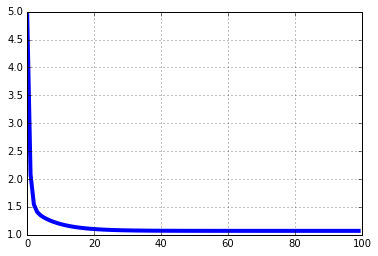

In [6]:
# plot the cost
plt.plot(cost_history, lw=4)
plt.grid()
plt.show()

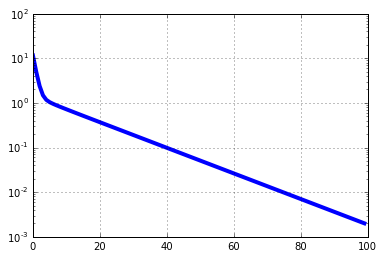

In [7]:
plt.plot(grad_history, lw=4)
plt.grid()
plt.yscale('log')
plt.show()

### Exercise (20 min): 

Use the gradient descent algorithm to solve a logistic regression problem. The data is given below. You will need to:

 * Define the function
 * Define the gradient
 * Compute the step size
 * Perform gradient descent

In [8]:
import numpy as np
np.random.seed(0)

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = A.dot(w) + np.random.randn(n_samples)